**We are going to create a Random Forest classifier for the dataset Seeds.csv. The dataset contains information to predict the  output variable i.e Seeds type based on the independent variables**

In [146]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [147]:
#Load Dataset
df1 = pd.read_csv('./Seeds_AI.csv')
df1.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [148]:
#to display the column names in the dataset
df1.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [149]:
#to display the dataset values
df1.values

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [150]:
#to display the type of the dataset
type(df1) 

pandas.core.frame.DataFrame

In [151]:
#Identify number of Classes (i.e. Class)
df1.Type.unique()

array([1, 2, 3], dtype=int64)

In [152]:
# to successfully import (199 records)
df1.shape

(199, 8)

In [153]:
# To print the variable Class values
print("Feature Vector Data:")
print(df1.Type)

Feature Vector Data:
0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int64


In [154]:
#to display all the columns and values in the dataset
display(df1)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


**EDA : Exploratory Data Analysis**

In [155]:
#to find the key attributes
df1.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [156]:
# is there any missing data ?
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(199)

,Total,Percent
Area,0,0.0
Perimeter,0,0.0
Compactness,0,0.0
Kernel.Length,0,0.0
Kernel.Width,0,0.0
Asymmetry.Coeff,0,0.0
Kernel.Groove,0,0.0
Type,0,0.0


In [157]:
# Any missing values?
print(df1.isnull().values.any())

False


<AxesSubplot:>

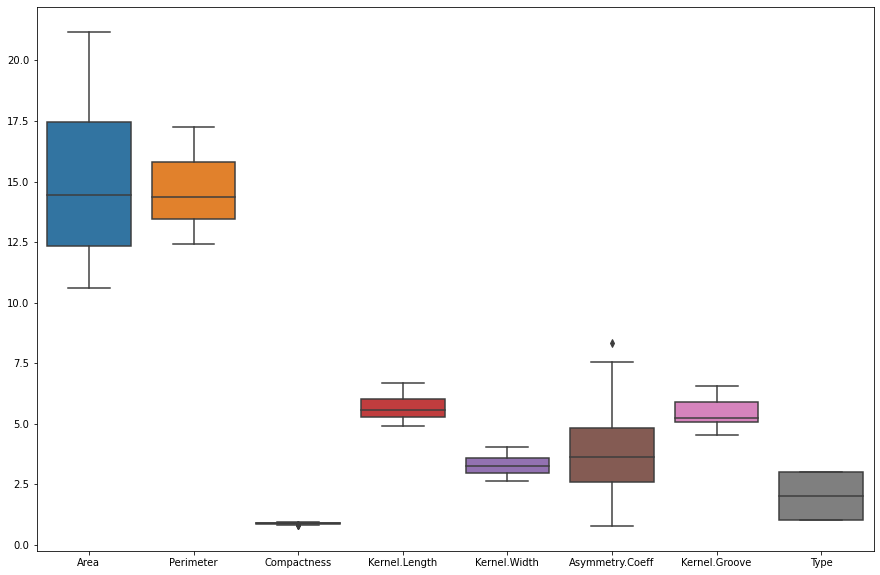

In [158]:
#Boxplot Visualization to check outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df1)

<AxesSubplot:>

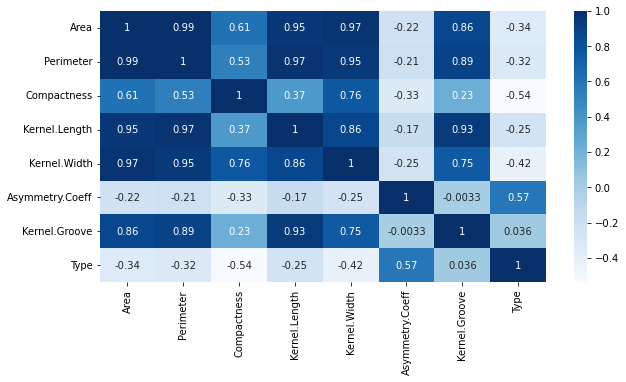

In [159]:
#Visualization of Correlations for Seeds dataset
fig = plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap="Blues")

**From the heat map we found out that majority of the input variables are positively correlated than negatively correlated ones.**

In [160]:
#Find Independent Column Correlations for Seeds dataset 
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df1,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('Perimeter', 'Area'), ('Kernel.Length', 'Area'), ('Kernel.Length', 'Perimeter'), ('Kernel.Width', 'Area'), ('Kernel.Width', 'Perimeter'), ('Kernel.Width', 'Kernel.Length'), ('Kernel.Groove', 'Area'), ('Kernel.Groove', 'Perimeter'), ('Kernel.Groove', 'Kernel.Length')]


**The above input variables are highly correlated because they have the correlation between them greater than 80%.**

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_15100/3070951549.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax=ax)


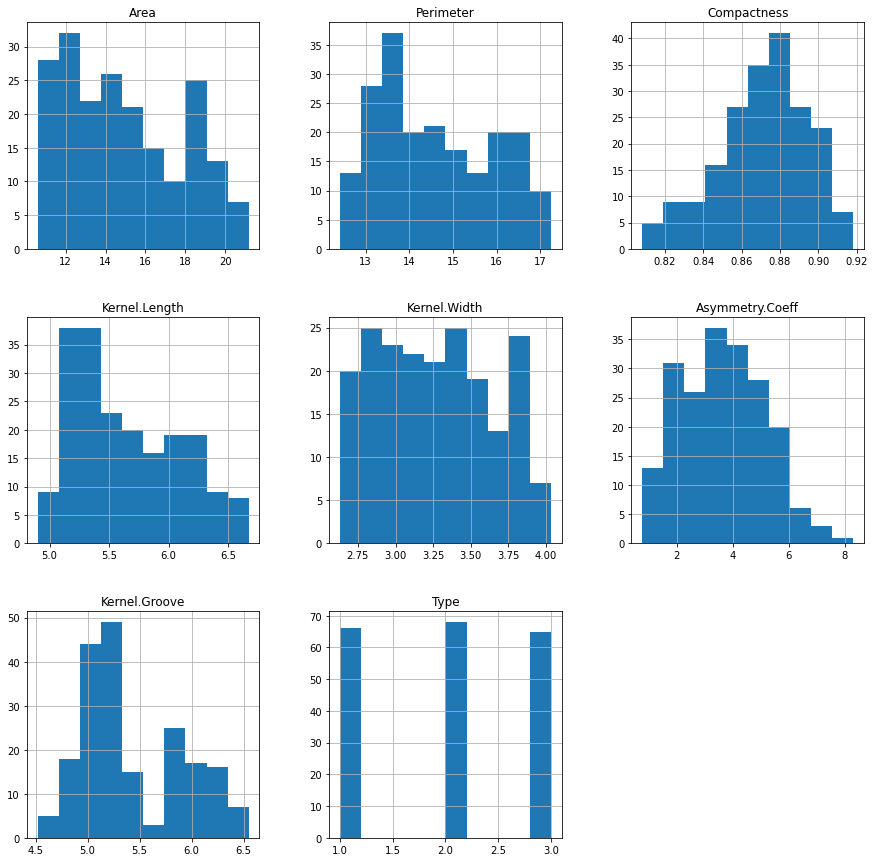

In [161]:
#Histogram visualizations for the Seeds dataset 
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df1.hist(ax=ax)
plt.show()

**Feature Selection**

In [162]:
#split dataset in features and target variable
feature_cols = ['Area', 'Perimeter', 'Compactness', 'Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove']
X = df1[feature_cols] # Features
y = df1.Type # Target variable

In [163]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [164]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


# instantiate the model (using the default parameters)
randomforest=RandomForestClassifier()

# fit the model with data
randomforest.fit(X_train,y_train)

#
y_pred=randomforest.predict(X_test)

In [165]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**The accuracy value is 93%. This tells that this model detects the type of the seed correctly about 93%**

In [166]:
#to display the accuracy score. To cross check whether the accuracy score is correct
random.score(X_test, y_test)

0.9333333333333333

In [167]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11666666666666667
Mean Squared Error: 0.21666666666666667
Root Mean Squared Error: 0.4654746681256314


**You can see that the value of root mean squared error is 0.46, which is less than 10% of the mean value of the percentages of the Type. This means that our algorithm was very accurate enough to make reasonably good predictions**

**Cross Validation**

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [169]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [170]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, stratify = df1.Type, random_state=0)

In [171]:
#To display the accuracy value
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name  Score
0  KNN   0.94
1   DT   0.94
2   RF   0.94


In [172]:
#To display the accuracy value using cross val
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.889737
1   DT  0.920000
2   RF  0.945000


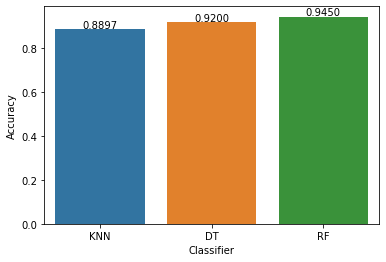

In [173]:
#To display the accuracy values in terms of Box plot
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

**The above output shows that RF has the best accuracy among the three models**

**Random Forest Classifier is a very powerful model. In this model development we had achieved a accuracy score of 94.5%. But we are not confident enough of the accuracy score obtained in this because dataset doesn't contain enough data values to create a trustable predictor. So, we need to use a dataset of more number of samples to be sure about the accuracy score obtained.**

In [174]:
# Create a Pickle file  
import pickle
pickle_out = open("randomforest.pkl","wb")
pickle.dump(randomforest, pickle_out)
pickle_out.close()

In [175]:
#Prediction of the seed type
randomforest.predict([[12.19,13.20,0.8783,5.137,2.981,3.631,4.870]])

array([3], dtype=int64)